In [38]:
import warnings
warnings.filterwarnings("ignore")


# Insurance dataset

In [39]:
import pandas as pd
#from google.colab import drive


#drive.mount('/content/drive')


data = pd.read_csv(r'C:\Users\vessy\OneDrive\Desktop\Sweden\Thesis\IBM Watson\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()

#https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data?resource=download

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# PCA for dimension reduction

We have applied PCA for dimension reduction in order to visualize how the data is distributed. We have used the explained variance ratio to see which number of components can preserve most of variance in the data.

Below we have plotted the explained variance ratios for each number of components.

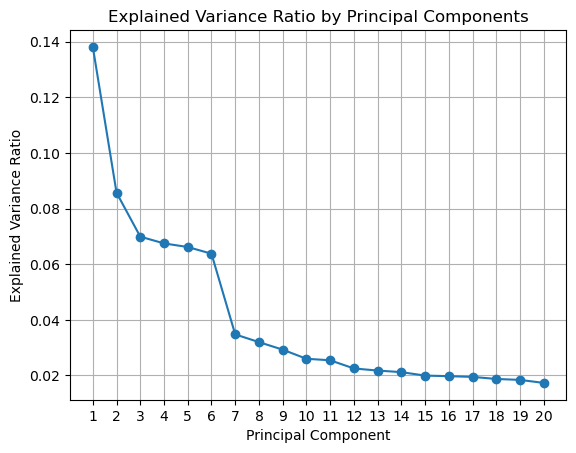

In [65]:
from sklearn.decomposition import PCA

# Initialize PCA with 20 principal components
pca = PCA(n_components=20)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Visualize the explained variance ratio
plt.plot(range(1, 21), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


We can see that just by using the first 2 principal components we preserve the most information. This is why we have applied dimensionality reduction with 2 principal components.

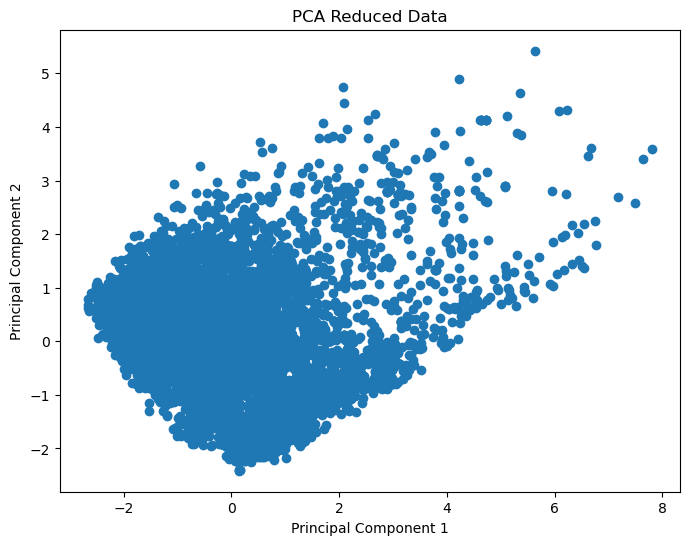

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Counting outliers in the blob based on Mean and Euclidean distance

Number of outliers: 281


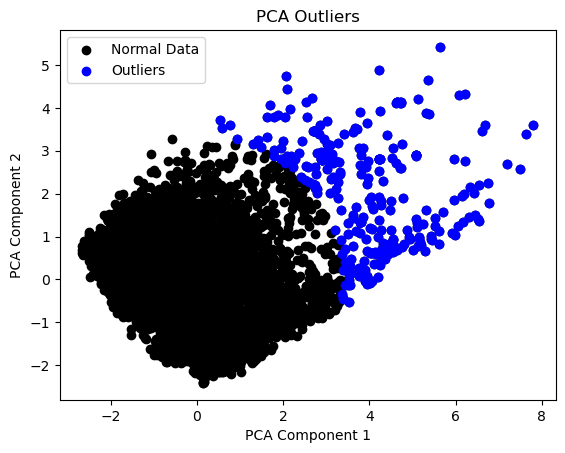

In [68]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt


# Calculate the mean in the PCA-transformed space
mean_pca = np.mean(X_train_pca, axis=0)

# Calculate the Euclidean distance of each point from the mean
distances = np.array([euclidean(point, mean_pca) for point in X_train_pca])

# Set a threshold for outlier detection (e.g., mean + 2 standard deviations)
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify outliers
outliers = np.where(distances > threshold)[0]  # Indices of outliers
outlier_count = len(outliers)

print(f"Number of outliers: {outlier_count}")

# Plot PCA with outliers highlighted
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='black', label='Normal Data')
plt.scatter(X_train_pca[outliers, 0], X_train_pca[outliers, 1], c='blue', label='Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Outliers')
plt.legend()
plt.show()


### Biplot to see loadings and top features

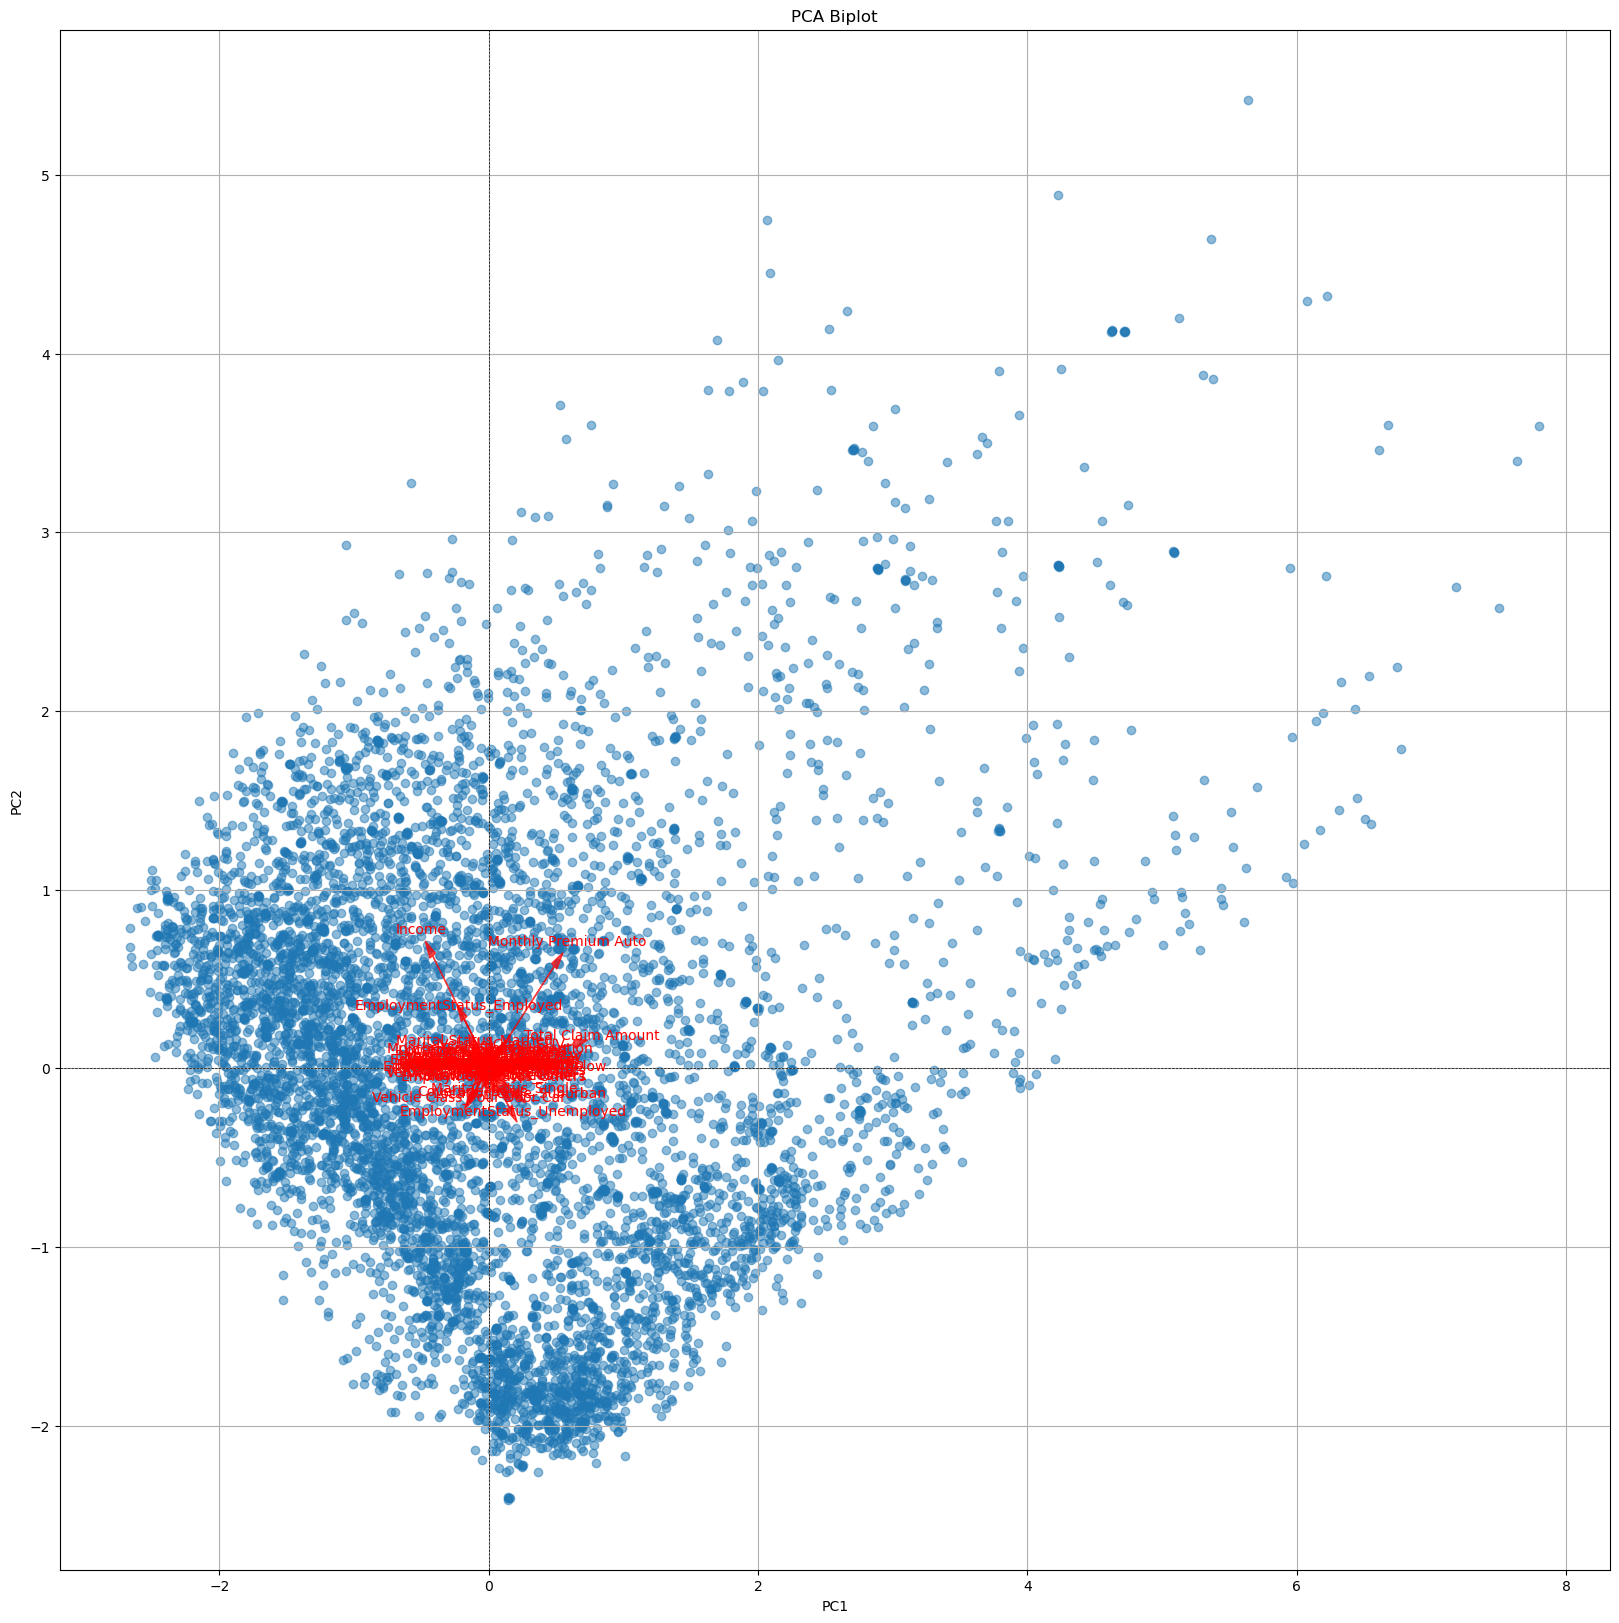

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

feature_names = X_train.columns.tolist()
loadings = pca.components_

num_top_features = 5
# Get indices of the top features based on loadings on PC1 or PC2
top_features_idx = np.argsort(np.abs(loadings), axis=1)[:, -num_top_features:]

def create_biplot(X_train_pca, loadings, feature_names, top_features_idx):
    # Create a scatter plot for the PCA-transformed data
    plt.figure(figsize=(20, 20))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label="Data Points")

    # Plot the loadings as arrows
    for i, feature in enumerate(feature_names):
        plt.arrow(
            0,
            0,
            loadings[0, i],
            loadings[1, i],
            color="red",
            alpha=0.7,
            head_width=0.05,
            head_length=0.1,
        )
        plt.text(
            loadings[0, i] * 1.2,
            loadings[1, i] * 1.2,
            feature,
            color="red",
            ha="center",
        )

    # Add labels, grid, and title
    plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.show()


# Use the feature names to create the biplot
create_biplot(X_train_pca, loadings, feature_names,top_features_idx)


### Top features and loadings in each component

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

num_top_features = 10
# Get indices of the top features based on loadings for each principal component
top_features_idx = np.argsort(np.abs(loadings), axis=1)[:, -num_top_features:]

# Build a list of dictionaries to create the DataFrame
top_features_list = []

# Loop through the components to gather the top features
for i, component in enumerate(loadings):
    # Get the indices of the top features for each component
    top_indices = np.argsort(np.abs(component))[-num_top_features:]
    
    # List the top features and their loadings
    for idx in top_indices:
        top_features_list.append({
            "Component": f"PC{i + 1}",  # Component number (1-based index)
            "Feature": feature_names[idx],  # Feature name
            "Loading": component[idx]  # Corresponding loading
        })

# Create the DataFrame from the list of dictionaries
top_features_df = pd.DataFrame(top_features_list)

# Display the DataFrame of top features
print("Top Features with Highest Loadings:")
print(top_features_df)

Top Features with Highest Loadings:
   Component                      Feature   Loading
0        PC1        Marital Status_Single  0.098899
1        PC1               Coverage_Basic -0.102669
2        PC1  Vehicle Class_Four-Door Car -0.119392
3        PC1          Location Code_Rural -0.123626
4        PC1  EmploymentStatus_Unemployed  0.153959
5        PC1    EmploymentStatus_Employed -0.182135
6        PC1       Location Code_Suburban  0.191544
7        PC1                       Income -0.416416
8        PC1         Monthly Premium Auto  0.486770
9        PC1           Total Claim Amount  0.636275
10       PC2       Marital Status_Married  0.111254
11       PC2        Marital Status_Single -0.112390
12       PC2               Coverage_Basic -0.126223
13       PC2       Location Code_Suburban -0.135841
14       PC2           Total Claim Amount  0.137117
15       PC2  Vehicle Class_Four-Door Car -0.151531
16       PC2  EmploymentStatus_Unemployed -0.220087
17       PC2    EmploymentSt

### Heatmap to show important feature loading per component (what particular component is measuring?)

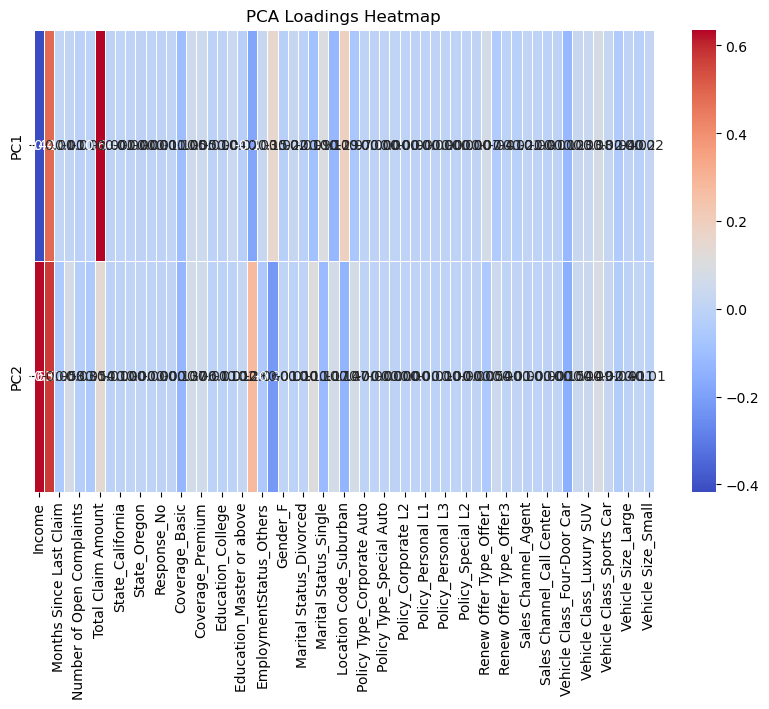

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

loadings_df = pd.DataFrame(loadings, columns=X_train.columns, index=["PC1", "PC2"])

# Create a heatmap to visualize the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("PCA Loadings Heatmap")
plt.show()

In [72]:
feature_names = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'State_Arizona',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Response_No', 'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_High School or Below', 'Education_Master or above',
       'EmploymentStatus_Employed', 'EmploymentStatus_Others',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Location Code_Rural',
       'Location Code_Suburban', 'Location Code_Urban',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L1',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Renew Offer Type_Offer1',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Sales Channel_Agent',
       'Sales Channel_Branch', 'Sales Channel_Call Center',
       'Sales Channel_Web', 'Vehicle Class_Four-Door Car',
       'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
       'Vehicle Class_SUV', 'Vehicle Class_Sports Car',
       'Vehicle Class_Two-Door Car', 'Vehicle Size_Large',
       'Vehicle Size_Medsize', 'Vehicle Size_Small']
abs_loadings = np.abs(pca.components_)

# Get feature importances by ranking the absolute loadings
feature_importances = np.argsort(-abs_loadings, axis=1)  # Sort in descending order

# Visualize feature importances
for i, component_importance in enumerate(feature_importances):
    print(f"Principal Component {i+1} Feature Importances:")
    for j, feature_index in enumerate(component_importance):
        feature_name = feature_names[feature_index]
        print(f"{feature_name}: {abs_loadings[i, feature_index]}")

Principal Component 1 Feature Importances:
Total Claim Amount: 0.636274828029873
Monthly Premium Auto: 0.4867700854109018
Income: 0.41641551943430033
Location Code_Suburban: 0.19154393248127574
EmploymentStatus_Employed: 0.18213524757767835
EmploymentStatus_Unemployed: 0.15395941247225686
Location Code_Rural: 0.12362550353053542
Vehicle Class_Four-Door Car: 0.11939244522755241
Coverage_Basic: 0.1026687012336896
Marital Status_Single: 0.09889852462682042
Marital Status_Married: 0.08791249094276452
Vehicle Class_SUV: 0.07966652233033102
Renew Offer Type_Offer1: 0.07149575122887825
Location Code_Urban: 0.06791842895074035
Coverage_Extended: 0.05394364272910238
Coverage_Premium: 0.048725058504587186
Renew Offer Type_Offer2: 0.0448364868901002
Vehicle Class_Two-Door Car: 0.04455047507494498
Education_High School or Below: 0.03561910192892184
Vehicle Class_Luxury SUV: 0.032097141142831145
Vehicle Class_Luxury Car: 0.03175971205574845
EmploymentStatus_Others: 0.02817583510542147
Education_Mas

PC2:
- Income: 0.6301832392097328
- Monthly Premium Auto: 0.5711823902029812
- EmploymentStatus_Employed: 0.27634087297809284
- EmploymentStatus_Unemployed: 0.2200870477420897
- Vehicle Class_Four-Door Car: 0.15153243821193138
- Total Claim Amount: 0.1371168603598656
- Location Code_Suburban: 0.13584140048824184
- Coverage_Basic: 0.12622172533152748
- Marital Status_Single: 0.11239009235980096
- Marital Status_Married: 0.11125558942935475
    
PC1:
- Total Claim Amount: 0.6362748604434921
- Monthly Premium Auto: 0.48677010000494203
- Income: 0.416415557705351
- Location Code_Suburban: 0.19154388886972568
- EmploymentStatus_Employed: 0.18213523601241338
- EmploymentStatus_Unemployed: 0.15395944548539917
- Location Code_Rural: 0.12362550366008078
- Vehicle Class_Four-Door Car: 0.11939233194637973
- Coverage_Basic: 0.10266869375045405

In [73]:
feature_importance_df = pd.DataFrame(columns=['Feature', 'PC1_Importance', 'PC2_Importance'])

# Iterate over each component and feature
for i, component_importance in enumerate(feature_importances):
    for j, feature_index in enumerate(component_importance):
        feature_name = feature_names[feature_index]
        importance_value = abs_loadings[i, feature_index]
        
        # Check the component and assign the importance value to the corresponding column
        if i == 0:
            feature_importance_df = feature_importance_df.append({'Feature': feature_name, 'PC1_Importance': importance_value}, ignore_index=True)
        elif i == 1:
            feature_importance_df.loc[feature_importance_df['Feature'] == feature_name, 'PC2_Importance'] = importance_value

# Set the index to 'Feature' column
feature_importance_df.set_index('Feature', inplace=True)

# Display the DataFrame with left-aligned text
print(feature_importance_df.to_string(justify='left'))

                                PC1_Importance PC2_Importance
Feature                                                      
Total Claim Amount              0.636275        0.137117     
Monthly Premium Auto            0.486770        0.571182     
Income                          0.416416        0.630183     
Location Code_Suburban          0.191544        0.135841     
EmploymentStatus_Employed       0.182135         0.27634     
EmploymentStatus_Unemployed     0.153959        0.220087     
Location Code_Rural             0.123626        0.065493     
Vehicle Class_Four-Door Car     0.119392        0.151531     
Coverage_Basic                  0.102669        0.126223     
Marital Status_Single           0.098899         0.11239     
Marital Status_Married          0.087912        0.111254     
Vehicle Class_SUV               0.079667        0.091486     
Renew Offer Type_Offer1         0.071496        0.051997     
Location Code_Urban             0.067918        0.070348     
Coverage

## Kmeans based on all features

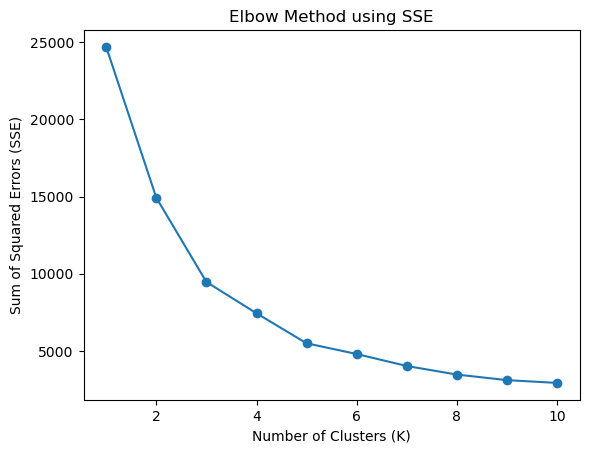

In [74]:
# Elbow with SSE
from sklearn.cluster import KMeans

sse = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method using SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

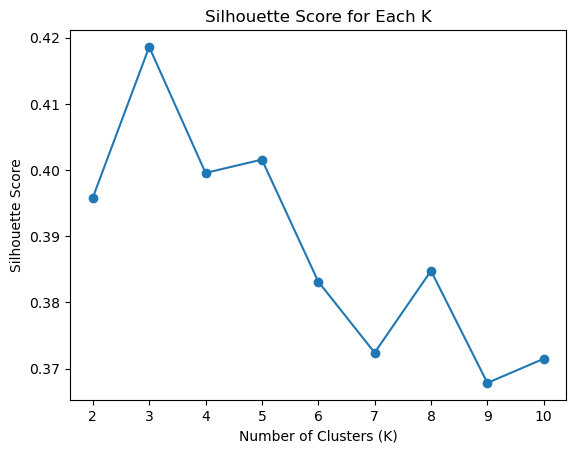

In [75]:
# Silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

k_values = range(2, 11)  # Starting from 2 clusters because silhouette score requires at least 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Each K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [76]:
data_table = {
    'K': range(1, 11),
    'SSE': sse,
    'Silhouette Score': [None] + silhouette_scores
}
df = pd.DataFrame(data_table)

df

,K,SSE,Silhouette Score
0,1,24698.211769,NaN
1,2,14926.891404,0.395826
2,3,9467.474613,0.418596
3,4,7437.162593,0.399559
4,5,5491.350132,0.401571
5,6,4797.522476,0.383128
6,7,4020.506122,0.372395
7,8,3465.026516,0.384765
8,9,3105.910755,0.367822
9,10,2924.316135,0.371475


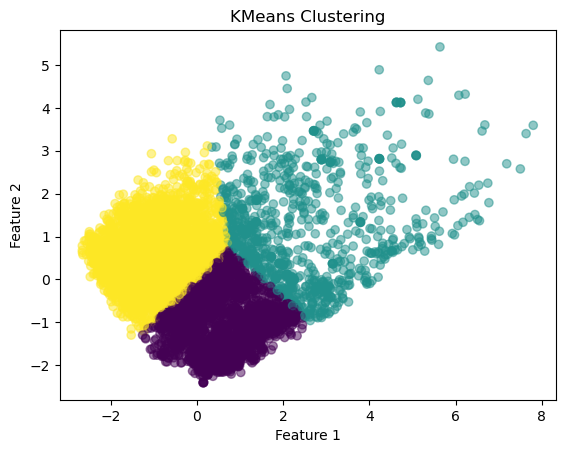

In [77]:
from sklearn.cluster import KMeans

# based on all features

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed

# Fit the KMeans model to the features
kmeans.fit(X_train_pca)

# Get the cluster labels for each data point
cluster_labels1 = kmeans.labels_

# Visualize the clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels1, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

In [78]:

from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=42)

# Fit KMeans to the scaled data
cluster_labels1 = kmeans.fit_predict(X_train_pca)

# Assign cluster labels to the original data
cluster_labels1 = pd.Series(cluster_labels1) # turn into pandas series
data_encoded['Cluster'] = cluster_labels1 + 1
data['Cluster'] = cluster_labels1 + 1

# Display cluster assignments
cluster_counts1 = cluster_labels1.value_counts() # count of data points in each cluster
cluster_counts1

1    3688
0    2772
2     847
dtype: int64

In [80]:
total_points1 = len(cluster_labels1)

# Calculate the percentage of counts in every cluster
percentage_counts_per_cluster1 = (cluster_counts1 / total_points1) * 100

# Print the percentage of counts in every cluster
for i, percentage_count in enumerate(percentage_counts_per_cluster1):
    print(f"Cluster {i}: {percentage_count:.2f}%")

Cluster 0: 50.47%
Cluster 1: 37.94%
Cluster 2: 11.59%


In [81]:
table_df1 = pd.DataFrame({'Count': cluster_counts1, 'Percentage': percentage_counts_per_cluster1})

# Sort the DataFrame by index (value)
table_df1 = table_df1.sort_values(by='Count', ascending=False)
table_df1

,Count,Percentage
1,3688,50.472150
0,2772,37.936226
2,847,11.591624


Below we have printed the characteristics of every cluster as well as their mean values. We have used the mean values to identify what the customers in each cluster look like.

In [82]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

grouped_data = data_encoded.groupby('Cluster')

# Iterate over each cluster and extract characteristics
for cluster_label, cluster_data in grouped_data:
    print(f"\nCharacteristics of Cluster {cluster_label}:")
    
    # Calculate summary statistics for numerical features
    cluster_summary = cluster_data.drop('Cluster', axis=1).describe()
    print(cluster_summary)



Characteristics of Cluster 1.0:
       Customer Lifetime Value       Income  Monthly Premium Auto  \
count              2772.000000  2772.000000           2772.000000   
mean                 -0.001225     0.034567             -0.004822   
std                   1.020983     1.015738              0.992575   
min                  -0.888851    -1.239617             -0.936442   
25%                  -0.588093    -1.239617             -0.732989   
50%                  -0.334656    -0.068911             -0.297020   
75%                   0.121263     0.848243              0.458660   
max                   8.718657     2.050896              5.922810   

       Months Since Last Claim  Months Since Policy Inception  \
count              2772.000000                    2772.000000   
mean                 -0.004115                       0.000956   
std                   0.993433                       1.004167   
min                  -1.498803                      -1.722470   
25%                 

In [83]:
cluster_characteristics = pd.DataFrame(columns=data_encoded.columns)

for cluster_label, cluster_data in grouped_data:
    cluster_summary = cluster_data.drop('Cluster', axis=1).describe()
    cluster_characteristics = cluster_characteristics.append(cluster_summary.loc[['mean']])

cluster_characteristics.index = ['Cluster ' + str(i) for i in cluster_characteristics.index]

cluster_characteristics

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Cluster
Cluster mean,-0.001225,0.034567,-0.004822,-0.004115,0.000956,0.001774,0.002834,-0.001801,0.205267,0.287157,...,0.503968,0.016595,0.020202,0.191919,0.053752,0.213564,0.095960,0.703463,0.200577,NaN
Cluster mean,-0.007154,0.003359,-0.001417,0.009429,0.003846,0.001899,0.011885,-0.019227,0.200108,0.297451,...,0.504610,0.017082,0.022234,0.192245,0.056670,0.207158,0.106562,0.702278,0.191161,NaN
Cluster mean,0.047513,-0.056606,0.029005,-0.032721,-0.011708,0.035566,0.013166,0.051422,0.192444,0.289256,...,0.519481,0.022432,0.017710,0.213695,0.044864,0.181818,0.103896,0.714286,0.181818,NaN


In [84]:
# Calculate the average CLV for each cluster
average_clv_per_cluster = data.groupby('Cluster')['Customer Lifetime Value'].mean()

# Print the average CLV for each cluster
print("Average CLV for each cluster:")
print(average_clv_per_cluster)

# Calculate the minimum and maximum CLV for each cluster
min_max_clv_per_cluster = data.groupby('Cluster')['Customer Lifetime Value'].agg(['min', 'max'])

# Print the range of CLV for each cluster
print("Range of CLV for each cluster:")
print(min_max_clv_per_cluster)


Average CLV for each cluster:
Cluster
1.0    7996.525223
2.0    7955.790558
3.0    8331.385362
Name: Customer Lifetime Value, dtype: float64
Range of CLV for each cluster:
                 min          max
Cluster                          
1.0      1898.007675  67907.27050
2.0      1898.683686  73225.95652
3.0      2004.350666  83325.38119


Cluster 1:
- mid CLV value
- highest income
- least monthly premium auto
- least number of open complaints
- least number of policies
- mid  total claim amount
- mid months since last claim
- mid months since policy inception
- mostly basic coverage
- mostly employed
- mostly married
- mostly offer1
- mostly four-door car

Cluster 2:
- lowest CLV
- mid income
- mid Monthly premium auto
- mid number of open complaints
- mid number of policies
- lowest claim amount
- highest months since last claim
- highets months since policy inception
- mostly basic coverage
- mostly employed
- mostly married
- offer 1
- four-door car

Cluster 3:
- highest CLV
- highest monthly premium auto
- highest number of open complaints
- highest number of policies
- highest total claim amount
- lowest income
- lowest months since last claim
- lowest months since policy inception
- mostly basic - but also more extended than the others
- mostly employed - but also more unemployed compared to the other 2
- mostly married
- mostly offer 1
- mostl four-door cars + more SUVs than the other 2

Valid for all:
- sales agent most popular and most effective
- mostly for personal auto
- mostly suburban
- bachelor or college education
- mostly from Oregon and California

Overall, the cluster with the highest CLV value is the third one. They are also the customers with highest claim amouunt, highest monthyl premium auto and highest number of policies. However, these customers have the lowest income among the clusters, which is a bit controversial. These seem to be the highest paying customers with the biggest estimated future profit they will being to the company.

The customers in cluster 2 are the ones with the lowest estimated CLV. On average, they have 1 policy and a very low number of complaints. They also have the lowest claim amount in USD. These customers seem to more disengaged in their relationship with the company. It doesn't really make a difference to them what specific policy they have and which company they are insured by.

The customers in cluster 1 are the ones with middle value of CLV but the highest income. They pay the least for monthyl premium auto and have the least number of complaints.

We can also say that in terms of demographics most of the customers are relatively similar.